In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def load_iris_data():
  wine = load_wine()

  df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
  df['target'] = wine.target

  return df

In [3]:
def prepare_data(df, feature_index=0, target_index=1):
  X = df.iloc[:, feature_index].values.reshape(-1, 1)
  y = df.iloc[:, target_index].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test

In [4]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, feature_name, target_name):
  model = LinearRegression()
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"\n Kết quả hồi quy tuyến tính: {feature_name} -> {target_name}" )
  print(f"Điểm cắt (intercept): {model.intercept_:.4f}")
  print(f"Hệ số góc (slope): {model.coef_[0]:.4f}")
  print(f"Phương trình hồi quy: y= {model.intercept_:.4f} + {model.coef_[0]:.4f}x")
  print(f"  - MSE (train): {train_mse}")
  print(f"  - MSE (test): {test_mse}")
  print(f"  - R2 (train): {train_r2}")
  print(f"  - R2 (test): {test_r2}")

  plt.figure(figsize=(12,5))

  plt.subplot(1, 2, 1)
  plt.scatter(X_train, y_train, color='red', label='Dữ liệu gốc')
  plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label='Đường hồi quy tuyến tính')
  plt.xlabel(feature_name)
  plt.ylabel(target_name)
  plt.title('Tập huấn luyện')
  plt.legend()
  plt.grid(True)



  plt.subplot(1, 2, 2)
  plt.scatter(X_test, y_test, color='red', label='Dữ liệu gốc')
  plt.plot(X_test, y_test_pred, color='blue', linewidth=2, label='Đường hồi quy tuyến tính')
  plt.xlabel(feature_name)
  plt.ylabel(target_name)
  plt.title('Tập kiểm tra')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

  return model

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

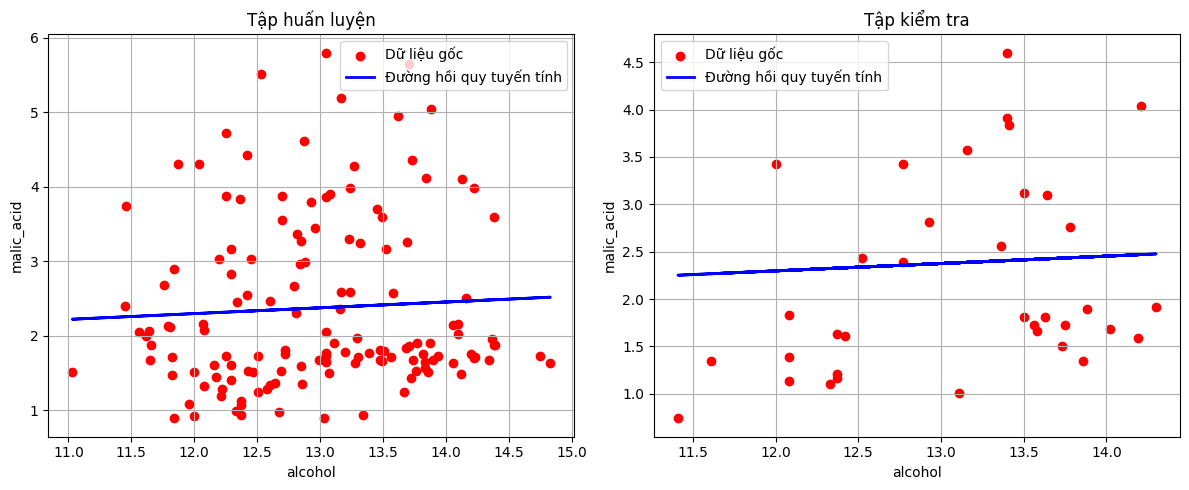

In [5]:
df = load_iris_data()
print(df.head())

feature_names = df.columns[:-1]
print(feature_names)

feature_index = 0
target_index = 1

X_train, X_test, y_train, y_test = prepare_data(df, feature_index, target_index)

model = train_and_evaluate_model(X_train, X_test, y_train, y_test,  feature_names[feature_index],
      feature_names[target_index])